In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

K-Means Clustering for Customer Segmentation
Task: Use K-Means clustering to segment customers in the Wholesale Customers dataset based on their annual spending in different categories. Visualize the clusters.


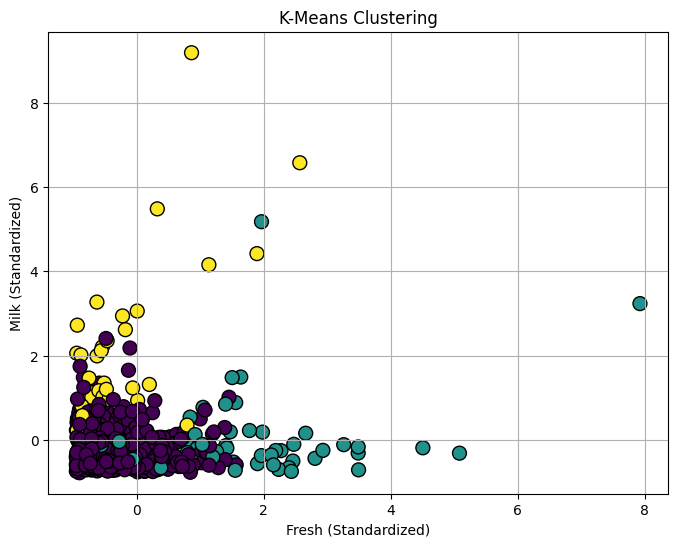

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans_labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Fresh (Standardized)')
plt.ylabel('Milk (Standardized)')
plt.grid(True)
plt.show()

Evaluating the Optimal Number of Clusters
Task: Determine the optimal number of clusters for the Wholesale Customers dataset using the Elbow Method and Silhouette Score. Visualize the results and justify your choice.


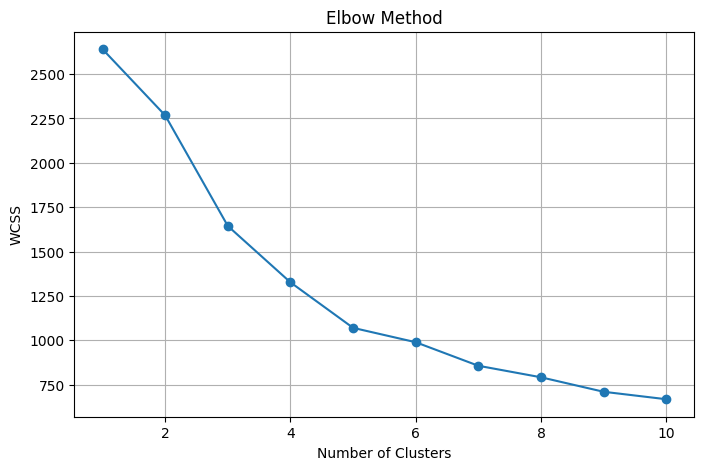

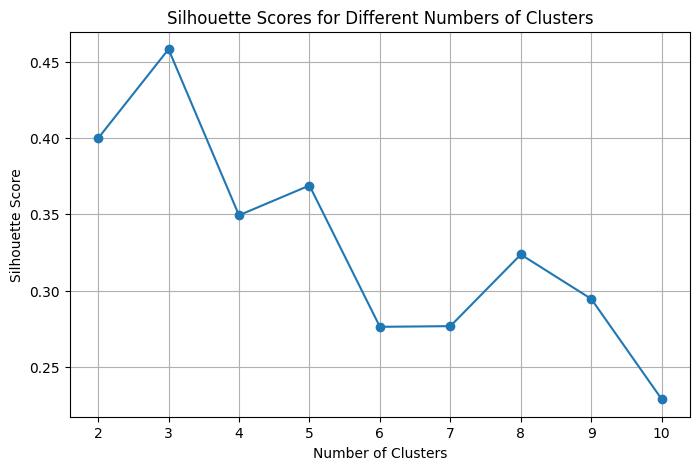

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Cluster Analysis and Interpretation
Task: Interpret the clusters formed in the Wholesale Customers dataset. Identify the characteristics and differences among the clusters based on spending behavior.


In [11]:

cluster_analysis = df.groupby('KMeans_Cluster').mean()


print("Cluster Analysis:\n", cluster_analysis)


Cluster Analysis:
                  Channel    Region         Fresh          Milk       Grocery  \
KMeans_Cluster                                                                 
0               1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1               1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2               2.000000  2.405405   8704.864865  20534.405405  30466.243243   

                     Frozen  Detergents_Paper   Delicassen  
KMeans_Cluster                                              
0               2167.231429       1913.605714  1102.120000  
1               9841.735849        981.471698  3664.245283  
2               1932.621622      14758.837838  2459.351351  


Hierarchical Clustering: Dendrogram and Cluster Formation
Task: Apply hierarchical clustering to the Wholesale Customers dataset and visualize the dendrogram. Compare the cluster assignments with those obtained from K-Means.


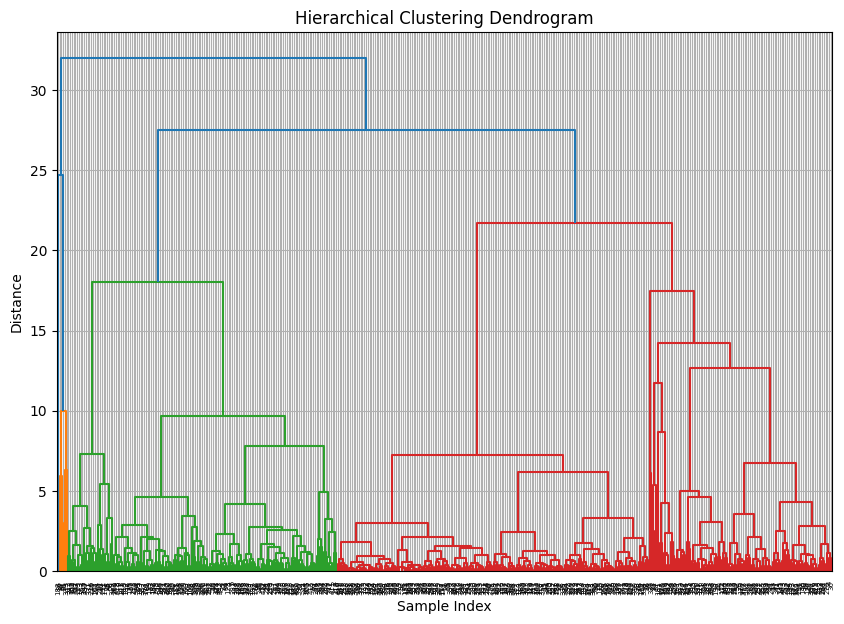

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Assign clusters based on dendrogram (e.g., using 3 clusters)
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Add hierarchical cluster labels to the DataFrame
df['Hierarchical_Cluster'] = hierarchical_labels


Comparison of Clustering Results
Task: Compare the effectiveness of K-Means and hierarchical clustering on the Wholesale Customers dataset. Discuss the results in terms of cluster cohesion and separation.


K-Means Cluster Assignments:
 0      0
1      0
2      0
3      0
4      1
      ..
435    1
436    1
437    2
438    0
439    0
Name: KMeans_Cluster, Length: 440, dtype: int32

Hierarchical Cluster Assignments:
 0      2
1      2
2      2
3      3
4      3
      ..
435    3
436    3
437    2
438    3
439    3
Name: Hierarchical_Cluster, Length: 440, dtype: int32


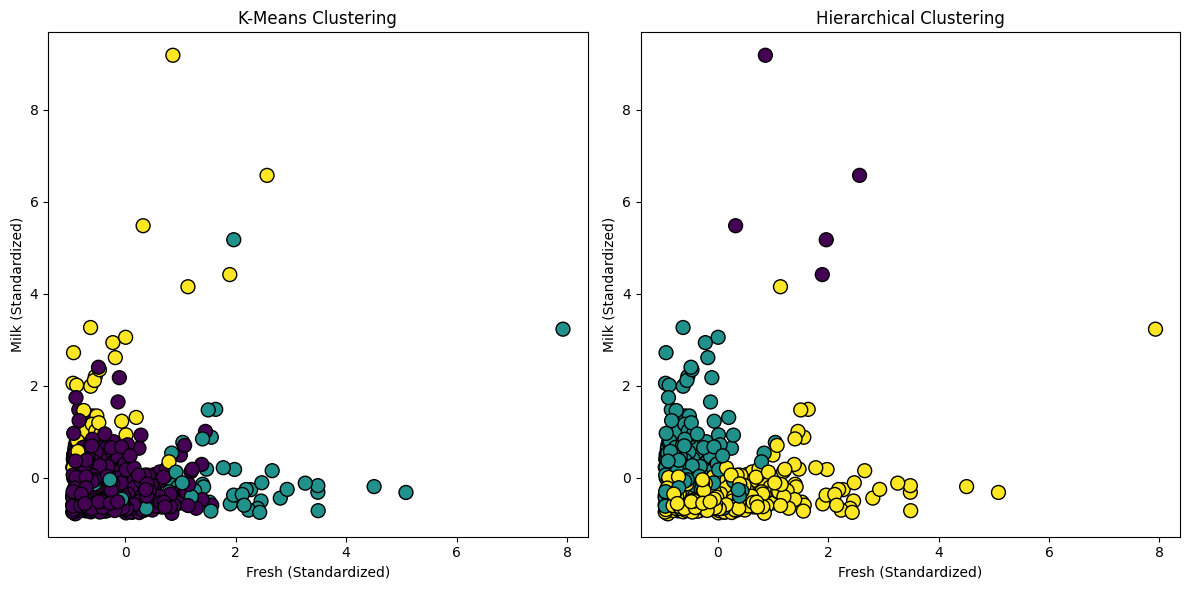

In [13]:
print("K-Means Cluster Assignments:\n", df['KMeans_Cluster'])
print("\nHierarchical Cluster Assignments:\n", df['Hierarchical_Cluster'])

# Visualize comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Fresh (Standardized)')
plt.ylabel('Milk (Standardized)')

plt.subplot(1, 2, 2)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=hierarchical_labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('Hierarchical Clustering')
plt.xlabel('Fresh (Standardized)')
plt.ylabel('Milk (Standardized)')

plt.tight_layout()
plt.show()
